# Weekly Weather Radar

In [15]:
import pandas as pd 
from pandas_datareader import data as wb
import yfinance 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [16]:
yfinance.pdr_override()

## Getting Data & Resampling to Weekly

In [17]:
ihsg_data = wb.get_data_yahoo('^JKSE', start = '1992-01-01', end = '2023-03-31')[['Close']]


[*********************100%***********************]  1 of 1 completed


In [18]:
ihsg_data.head()

,Close
Date,
1992-01-02,246.953003
1992-01-03,247.389999
1992-01-06,249.763000
1992-01-07,248.272003
1992-01-08,250.529007


In [19]:
ihsg_weekly = ihsg_data.resample('W', kind = 'period').last()
ihsg_weekly.head()

,Close
Date,
1991-12-30/1992-01-05,247.389999
1992-01-06/1992-01-12,250.201996
1992-01-13/1992-01-19,251.251007
1992-01-20/1992-01-26,258.050995
1992-01-27/1992-02-02,282.240997


## Calculating Annualize Weekly Return

In [20]:
ihsg_weekly['weekly_return'] = np.log(ihsg_weekly['Close']/ ihsg_weekly['Close'].shift(1)) * 52 
ihsg_weekly.dropna(inplace = True)

In [21]:
ihsg_weekly.head()

,Close,weekly_return
Date,,
1992-01-06/1992-01-12,250.201996,0.587732
1992-01-13/1992-01-19,251.251007,0.217562
1992-01-20/1992-01-26,258.050995,1.388647
1992-01-27/1992-02-02,282.240997,4.659412
1992-02-03/1992-02-09,294.226013,2.162520


## Preparing to Creating Weather Chart For Annualized Weekly Return

In [26]:
weeks = ihsg_weekly.index.size #counting the numbers of week is available from the data

In [29]:
windows = [week for week in range(weeks, 0, -1)] # to iterate for each week for the chart

In [ ]:
for week in windows :
    ihsg_weekly[f'{week}W'] = ihsg_weekly['weekly_return'].rolling(week).mean()

In [34]:
triangle = ihsg_weekly.drop(columns = ['Close', 'weekly_return'])

In [35]:
triangle

,1600W,1599W,1598W,1597W,1596W,1595W,1594W,1593W,1592W,1591W,...,10W,9W,8W,7W,6W,5W,4W,3W,2W,1W
Date,,,,,,,,,,,,,,,,,,,,,
1992-01-06/1992-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.587732
1992-01-13/1992-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.402647,0.217562
1992-01-20/1992-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.731314,0.803105,1.388647
1992-01-27/1992-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.713339,2.088541,3.024030,4.659412
1992-02-03/1992-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.803175,2.107035,2.736860,3.410966,2.162520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27/2023-03-05,NaN,NaN,NaN,NaN,0.115885,0.115589,0.115525,0.114726,0.111872,0.110583,...,0.009903,-0.031276,0.124318,0.189714,-0.077616,-0.129457,-0.185826,-0.168836,-0.311327,-0.326679
2023-03-06/2023-03-12,NaN,NaN,NaN,0.115581,0.115285,0.115221,0.114422,0.111569,0.110281,0.110473,...,-0.065167,0.069372,0.119726,-0.119413,-0.169579,-0.222699,-0.219175,-0.330948,-0.348435,-0.370191
2023-03-13/2023-03-19,NaN,NaN,0.115087,0.114791,0.114727,0.113928,0.111076,0.109789,0.109981,0.111554,...,-0.004920,0.031584,-0.188680,-0.241575,-0.297841,-0.310050,-0.416598,-0.456806,-0.521870,-0.673549


### Drawing Weather Chart

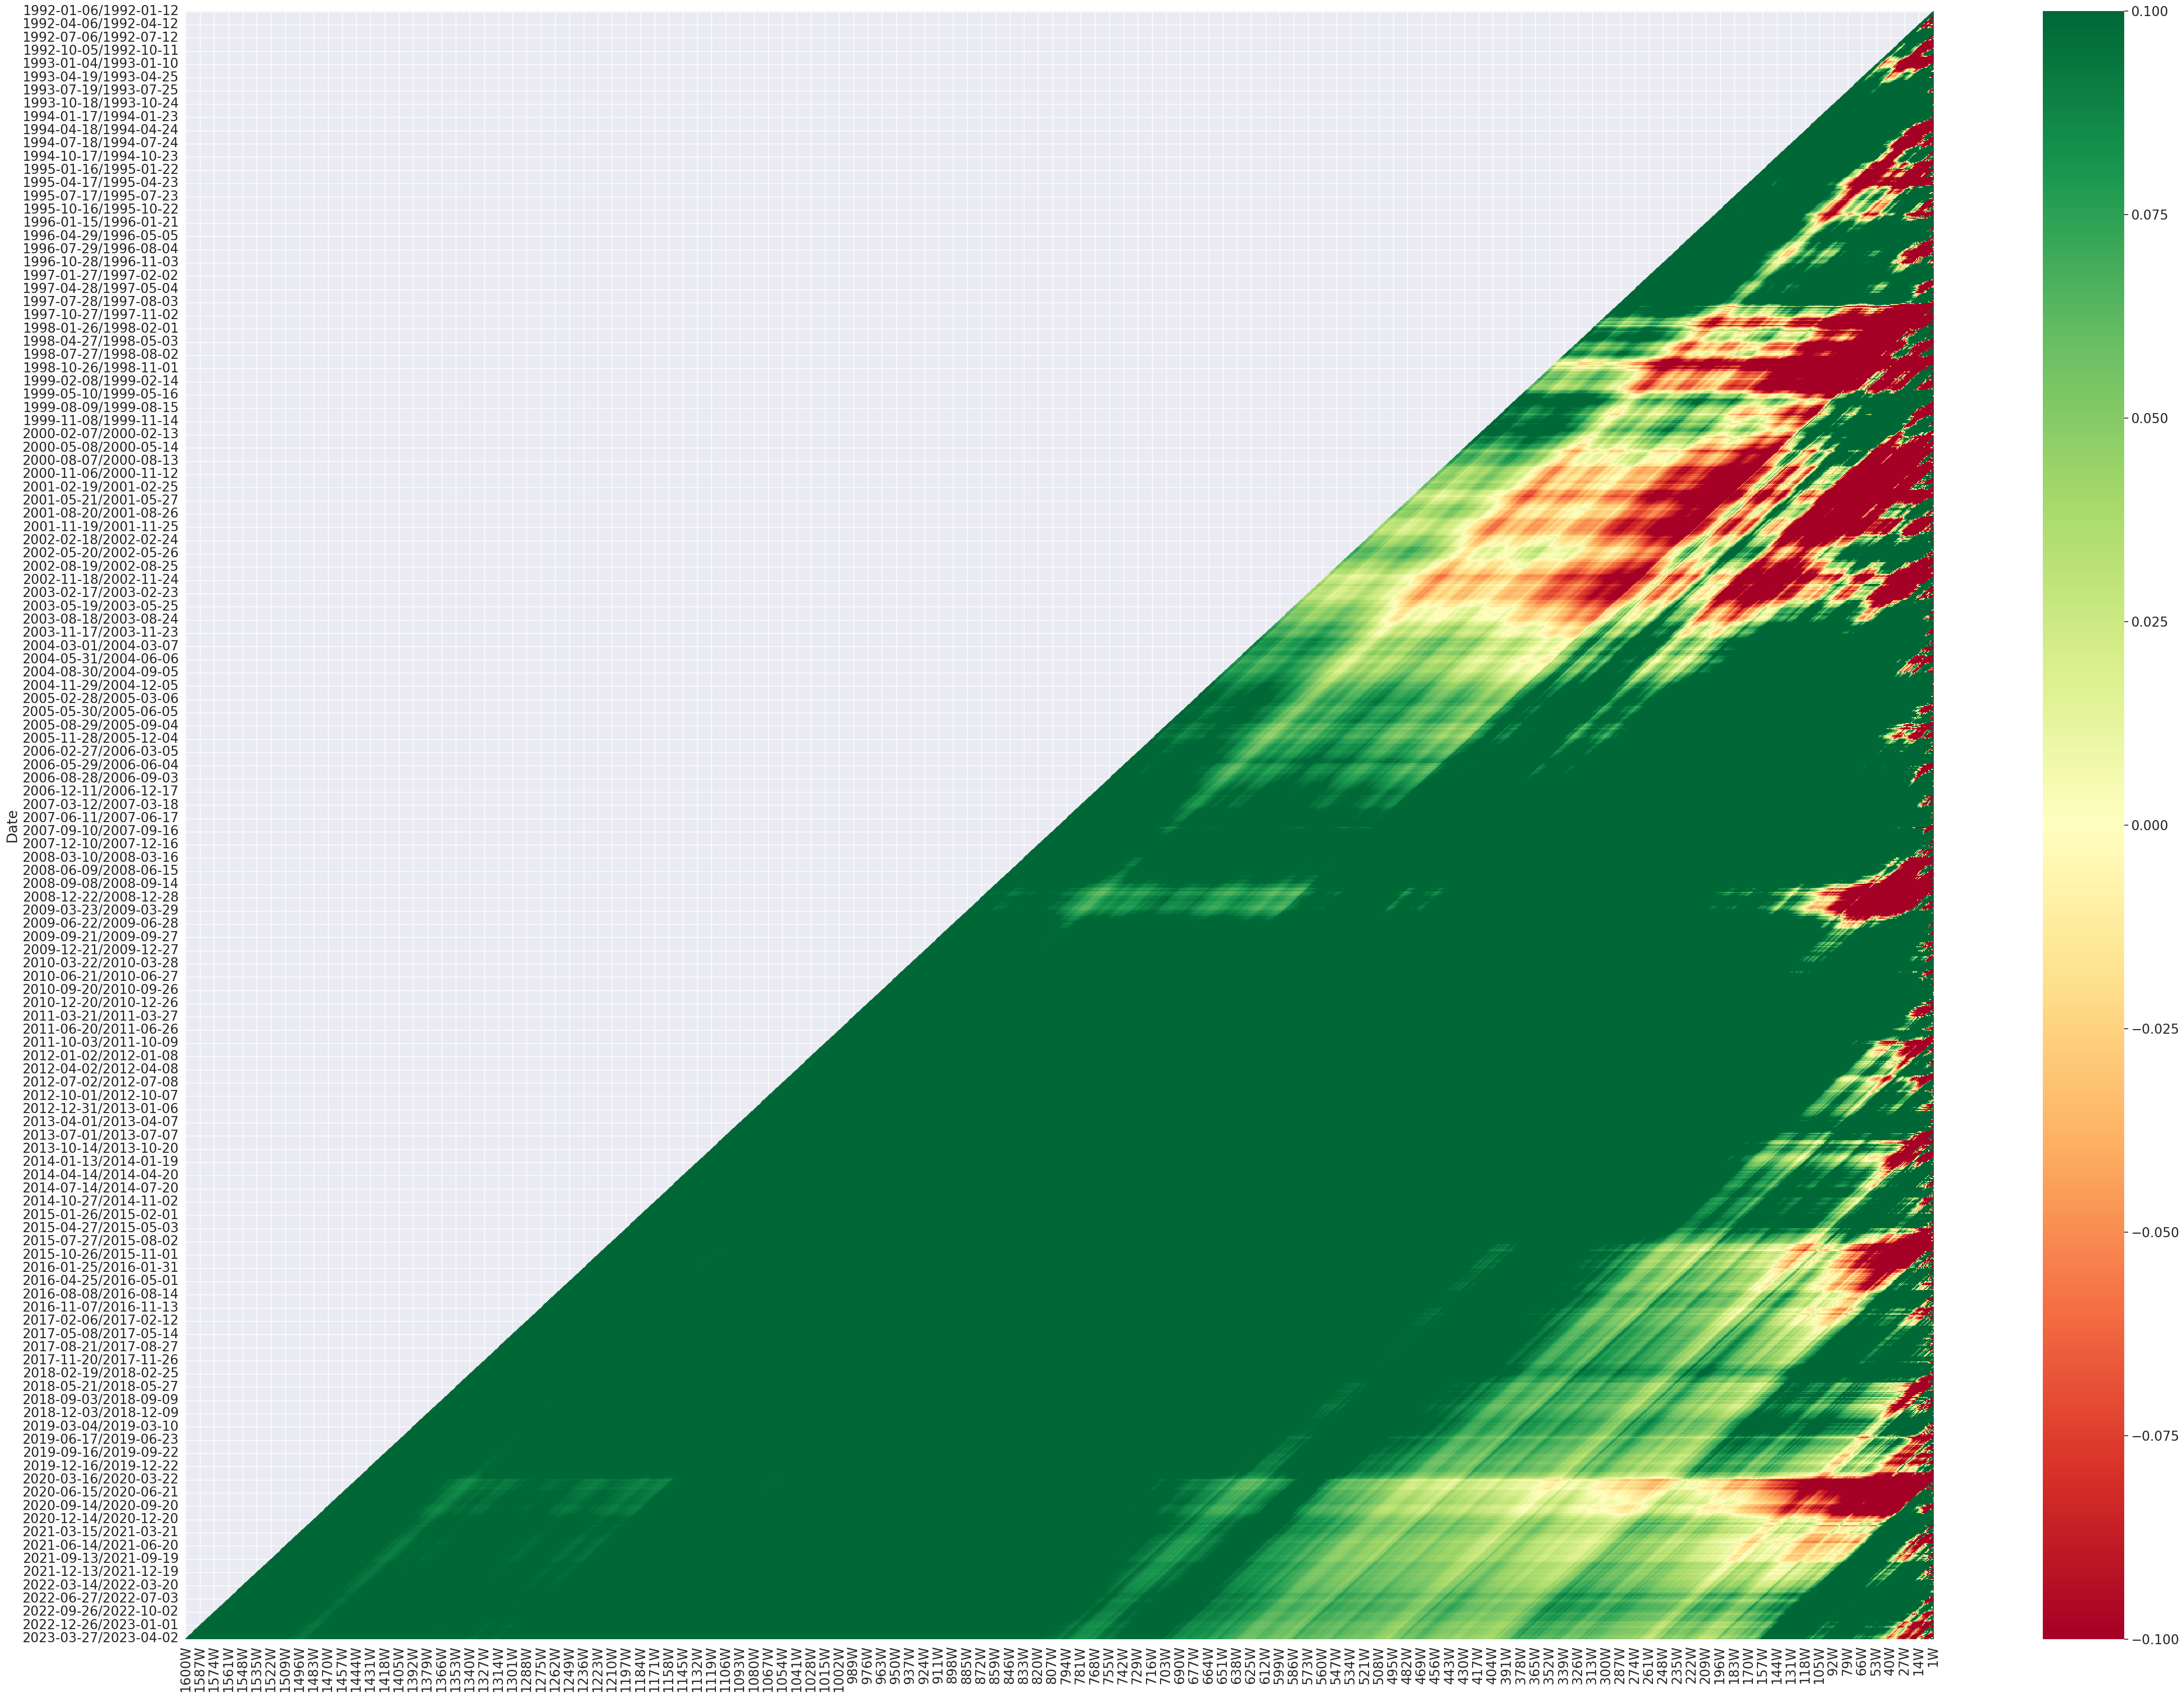

In [37]:
plt.figure(figsize = (50, 40))
sns.set(font_scale = 1.7)
sns.heatmap(triangle, annot = False, cmap = 'RdYlGn', vmax = 0.1, vmin = -0.1, center = 0)
plt.show()